In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

error rates= [16271708332803.307, 16230046151443.629, 16188499892836.768, 16147069278474.947, 16105753888156.807, 16064553572123.092, 16023467911822.766, 15982496765728.56, 15941639716901.707, 15900896483448.416, 15860266791546.357, 15819750360440.477, 15779346909960.252, 15739056167970.885, 15698877855435.223, 15658811693897.906, 15618857280997.043, 15579014471772.508, 15539282865426.262, 15499662193830.377, 15460152174637.89, 15420752664242.676, 15381463272346.518, 15342283595367.68, 15303213491353.723, 15264252695486.875, 15225400936165.867, 15186657820270.498, 15148023207147.787, 15109496705213.416, 15071078045753.428, 15032766967874.78, 14994563203958.96, 14956466494185.15, 14918476572026.85, 14880593178732.074, 14842816048862.896, 14805144924732.797, 14767579422269.338, 14730119278318.527, 14692764356733.922, 14655514282869.438, 14618368795170.105, 14581327632633.262, 14544390541925.701, 14507557270222.44, 14470827558108.988, 14434201153806.104, 14397677681372.154, 14361257008085

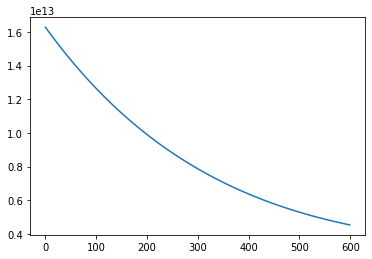

In [19]:
#Linear Regression
m_values=[]
c_values=[]
error_rate=[]

def LinearReg(m,c):
  y_pred=[]
  y_y_pred=[]
  y_p=[]
  m_x=[]
  Data=pd.read_csv("/content/drive/MyDrive/Real estate.csv")
  x=np.array(Data['X2 house age'])
  y=np.array(Data['Y house price of unit area'])
  for i in range(0,len(x)):
    y_pred.append(m*x[i]+c)
    y_p.append((m*x[i]+c)-y[i])
    y_y_pred.append((y[i]-y_pred[i])**2)
    m_x=y_p[i]*x[i]
  sum=np.array(y_y_pred).sum()
  error_rate.append(sum/float(len(x)))
  m_values.append(m)
  c_values.append(c)
  N=float(len(x))
  c_new=round(c-(0.001)*(1/N)*(np.array(y_p).sum()),3)
  m_new=round(m-(0.001)*(1/N)*(np.array(m_x).sum()),3)
  return m_new,c_new
  

m=1
c=1
m_values.append(1)
c_values.append(1)
for i in range(0,600):
  m,c=LinearReg(m,c)

print("error rates=",error_rate)
min_error=np.array(error_rate).min()
min_m=error_rate.index(min_error)
print("minimum error obtained at m =",m_values[min_m])
m_best=m_values[min_m]
c_best=c_values[min_m]
print("minimum error obtained at c =",c_values[min_m])
print("minimum error = ",min_error)


iterate=np.arange(0,600)
plt.plot(iterate,error_rate)

In [27]:
Data=pd.read_csv("/content/drive/MyDrive/Real estate.csv")
x=Data.iloc[:,0:7]
y=Data.iloc[:,7:8]

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

In [29]:
print(x_train)

      No  X1 transaction date  X2 house age  \
162  163             2012.750          16.0   
127  128             2013.250           3.8   
44    45             2013.583           2.7   
319  320             2013.250          34.6   
43    44             2012.750          34.4   
..   ...                  ...           ...   
132  133             2013.167          26.6   
289  290             2013.333          13.9   
109  110             2013.583           4.0   
395  396             2012.917          21.2   
176  177             2012.833          13.9   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
162                               4066.5870                                0   
127                                383.8624                                5   
44                                 533.4762                                4   
319                                272.6783                                5   
43                                 

In [30]:
print(x_test)

      No  X1 transaction date  X2 house age  \
150  151             2013.250          35.8   
269  270             2013.000          17.6   
89    90             2013.500          23.0   
403  404             2012.667          30.9   
115  116             2013.083          20.6   
..   ...                  ...           ...   
65    66             2013.417          40.1   
16    17             2013.250           0.0   
103  104             2012.750           0.0   
185  186             2012.750          31.4   
124  125             2012.917           9.9   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
150                                170.7311                                7   
269                                837.7233                                0   
89                                3947.9450                                0   
403                                161.9420                                9   
115                                

In [31]:
print(y_train)

     Y house price of unit area
162                     1160000
127                     5500000
44                      5390000
319                     2690000
43                      3410000
..                          ...
132                     3750000
289                     4450000
109                     2840000
395                     4250000
176                     1920000

[331 rows x 1 columns]


In [32]:
print(y_test)

     Y house price of unit area
150                     4850000
269                     2300000
89                      2530000
403                     3970000
115                     4640000
..                          ...
65                      4430000
16                      7010000
103                     4570000
185                     2150000
124                     5740000

[83 rows x 1 columns]


In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
dt=LinearRegression()
cc=dt.fit(x_train,y_train)

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
r2_score = regressor.score(x_test,y_test)
print(r2_score*100,'%')

67.40780819314013 %


In [63]:
from sklearn import svm
cc=svm.SVR(kernel='linear')
cc.fit(x_train,y_train)
r2_score = cc.score(x_test,y_test)
print(r2_score*100,'%')

49.26575767773743 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


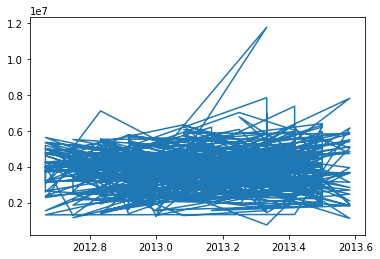

In [64]:
from matplotlib import pyplot as pt
x1=d['X1 transaction date']
y=d['Y house price of unit area']
pt.plot(x1,y)

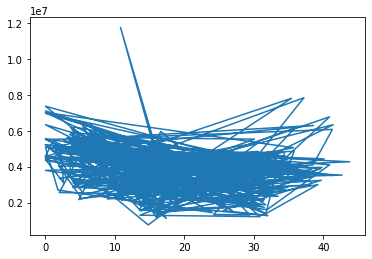

In [65]:
from matplotlib import pyplot as pt
x2=d['X2 house age']
y=d['Y house price of unit area']
pt.plot(x2,y)

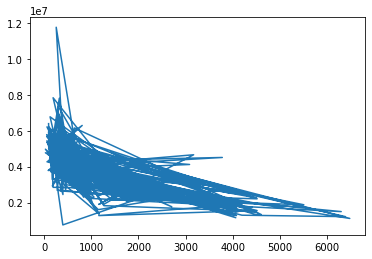

In [66]:
from matplotlib import pyplot as pt
x3=d['X3 distance to the nearest MRT station']
y=d['Y house price of unit area']
pt.plot(x3,y)

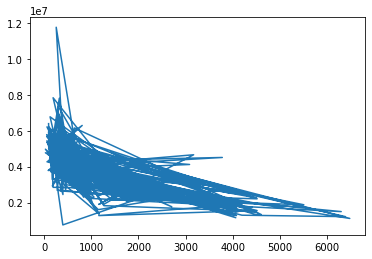

In [67]:
from matplotlib import pyplot as pt
x4=d['X3 distance to the nearest MRT station']
y=d['Y house price of unit area']
pt.plot(x4,y)

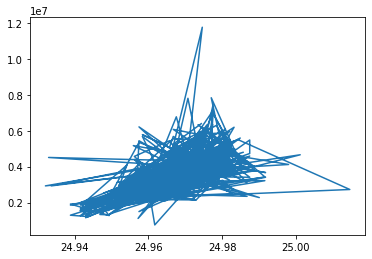

In [68]:
from matplotlib import pyplot as pt
x5=d['X5 latitude']
y=d['Y house price of unit area']
pt.plot(x5,y)

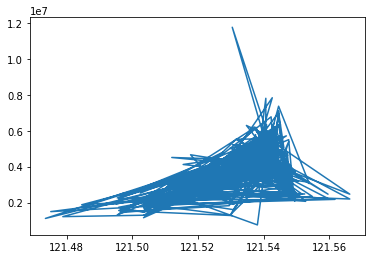

In [69]:
from matplotlib import pyplot as pt
x6=d['X6 longitude']
y=d['Y house price of unit area']
pt.plot(x6,y)